# Importación de las librerías

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#Procesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import statsmodels as sms
from statsmodels.stats.diagnostic import het_breuschpagan



# configuración de matplotlib
plt.rcParams['image.cmap']="bwr"
plt.rcParams['figure.dpi']="100"
plt.rcParams['savefig.bbox']="tight"
style.use('ggplot') or plt.style.use('ggplot')

# configuración de warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Advertising.csv', encoding = 'latin1')

# Lectura de datos

In [4]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Análisis Exploratorio descriptivo

```
# Tiene formato de código
```



In [5]:
 # Verificando na's
data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [7]:
# Describe
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
# Columns
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
#data = data.drop("Unnamed: 0", axis=1)

In [9]:
# Corr
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

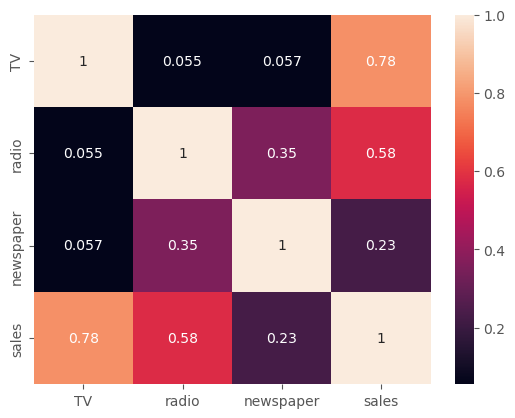

In [10]:
sns.heatmap(data.corr(), annot= True)

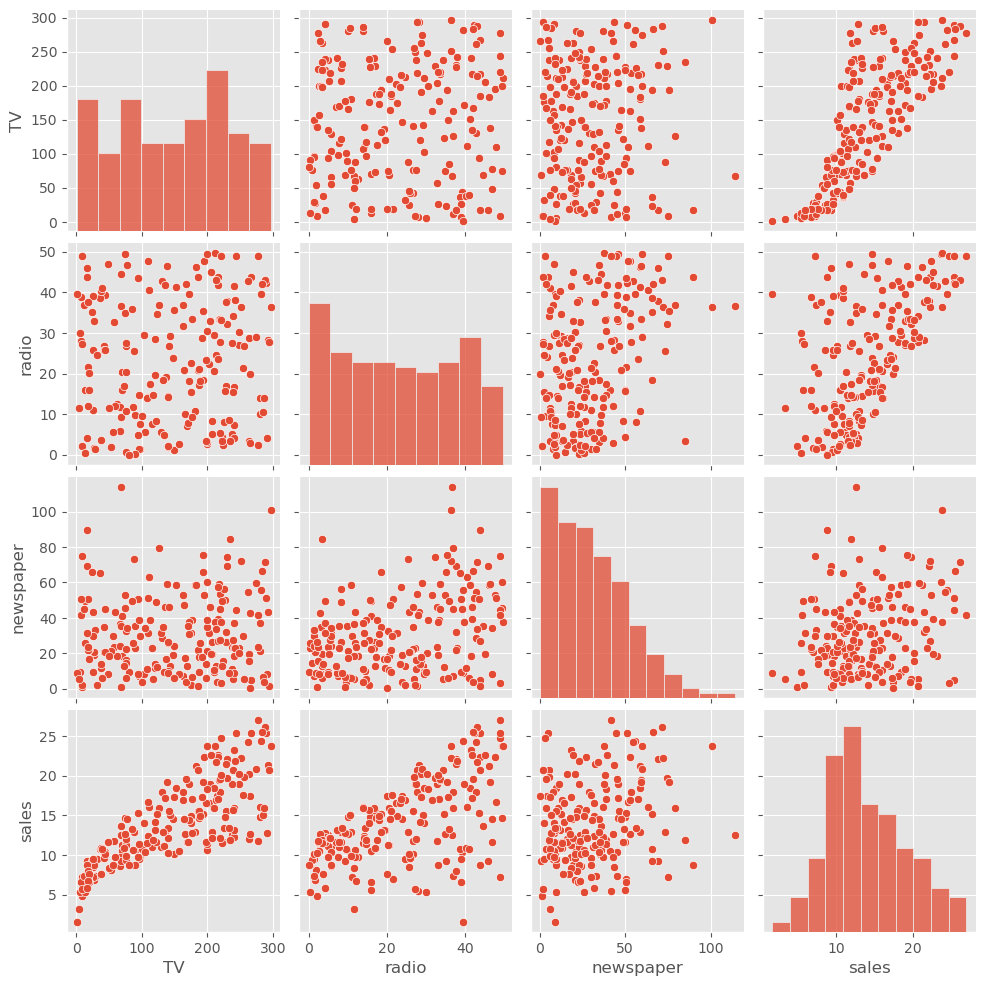

In [11]:
# Pairplot
sns.pairplot(data)

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>,
        <Axes: title={'center': 'newspaper'}>],
       [<Axes: title={'center': 'sales'}>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

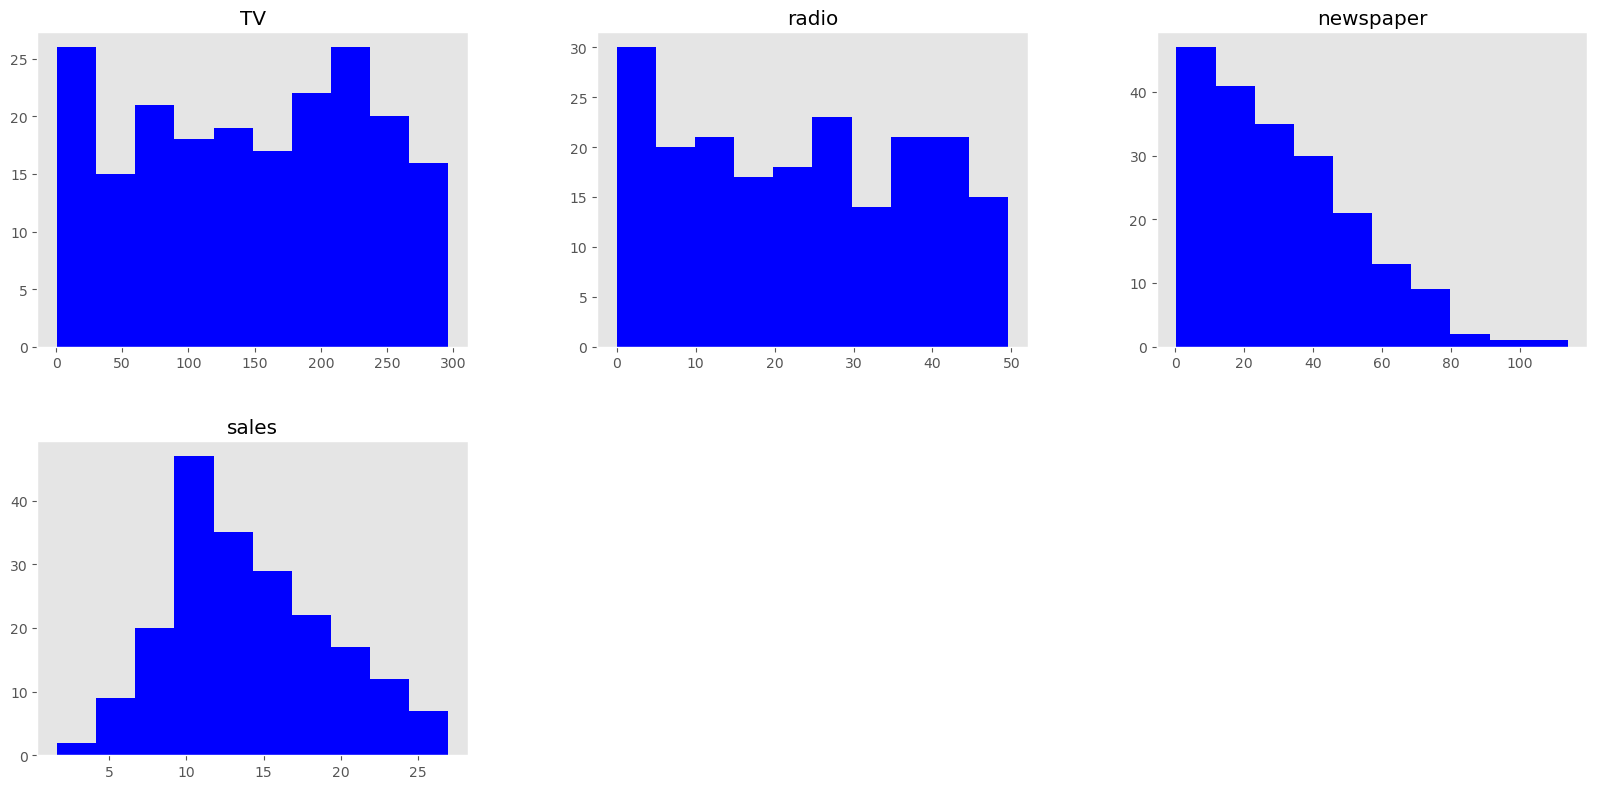

In [12]:
data.hist(figsize=(20,20), layout=(4,3), color='blue', grid= False)

<Axes: >

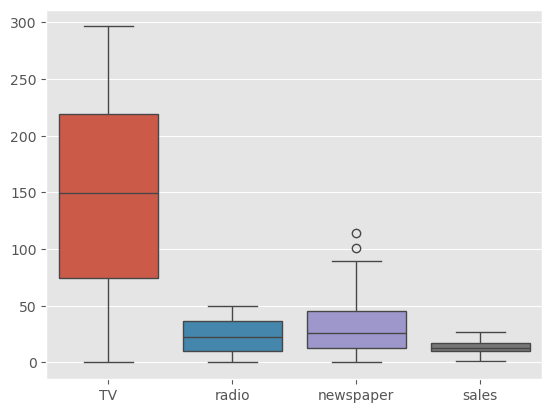

In [13]:
sns.boxplot(data)

<Axes: ylabel='TV'>

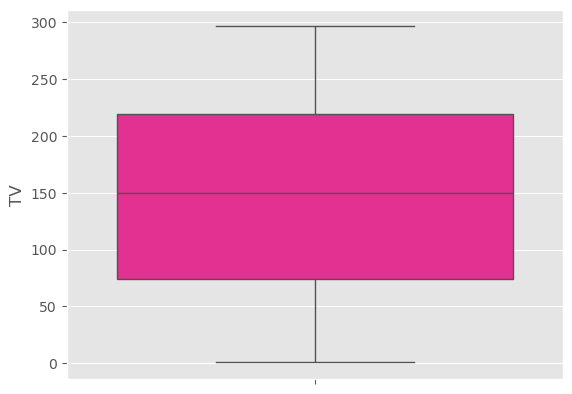

In [14]:
sns.boxplot(data.TV,color= 'deeppink')

# Formas de crear los modelos

## Ajuste del Modelo usando Scikit-learn ( Menos recomendado )

In [15]:
X = data[['TV']]
y = data[['sales']]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state =123,
                                        shuffle = True
)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature
#or array.reshape(1, -1) if it contains a single sample.

# para mas información vea help(train_test_split)

In [16]:
# Creación del modelo
modelo = LinearRegression()
modelo.fit(X=X_train.reshape(-1,1), y=y_train)

LinearRegression()

### Nota:
El modelo de regresión lineal de scikit-learn no proporciona un resumen detallado, para ello es mejor utilizar un modelo de regresión de statsmodels

In [18]:
# información del modelo
print('Intercepto', modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercepto [7.18152976]
Coeficiente: [('TV', 0.04589455852318402)]
Coeficiente de determinación R^2: 0.6108288998979227


In [19]:
#Desempeño de predicción
predicciones = modelo.predict(X=X_test)
print('Las predicciones son:\n',  predicciones)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        #squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

Las predicciones son:
 [[16.35126255]
 [10.86227335]
 [10.60985328]
 [ 9.23301652]
 [13.94179823]
 [18.1136136 ]
 [14.78166865]
 [15.56187614]
 [15.82806458]
 [ 7.71849609]
 [10.63739001]
 [16.58991425]
 [ 9.76080395]
 [ 8.039758  ]
 [ 7.78274847]
 [12.36302541]
 [15.47926594]
 [19.8805541 ]
 [ 8.04434746]
 [17.20490134]
 [ 8.0810631 ]
 [11.23401927]
 [ 8.00304235]
 [ 9.47625768]
 [17.292101  ]
 [ 8.41150392]
 [14.36861762]
 [13.73986217]
 [11.59658629]
 [17.11311222]
 [12.50529855]
 [18.69647449]
 [20.38080479]
 [ 8.07188419]
 [16.04835846]
 [17.26915372]
 [18.82956871]
 [15.66743363]
 [14.67611116]
 [10.55019035]]

El error (rmse) de test es: 10.125173588733954


## Ajuste del Modelo usando statsmodels

* Ajusta un modelo
* Calcula estadísticos
* Muestra la información a manera de resumen para verirficar los supuestos del modelo de regresión

In [20]:
X = data[['TV']]
y = data[['sales']]
X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size = 0.8,
                                        random_state =123,
                                        shuffle = True
)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature
#or array.reshape(1, -1) if it contains a single sample.

# para mas información vea help(train_test_split)

In [23]:
#shape
print(f'shape de X_test :{X_test.shape}  shape de y_train : {y_train.shape}')

shape de X_test :(40, 1)  shape de y_train : (160, 1)


In [27]:
# Creación del modelo utilizando el modo fórmula (similar a R)
# ==============================================================================
data_train = pd.DataFrame(np.hstack((X_train, y_train)), columns=['TV', 'sales'])
modelo = smf.ols(formula = 'sales ~ TV', data = data_train) #smf.ols es el comando que hace la regresión 
modelo = modelo.fit()

print(modelo.summary())

#help(np.hstack)
#hstack(tup)
#    Stack arrays in sequence horizontally (column wise).

#    This is equivalent to concatenation along the second axis, except for 1-D
#    arrays where it concatenates along the first axis. Rebuilds arrays divided
#    by `hsplit`.

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     229.2
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.44e-32
Time:                        14:52:50   Log-Likelihood:                -416.24
No. Observations:                 160   AIC:                             836.5
Df Residuals:                     158   BIC:                             842.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1815      0.525     13.673      0.0

In [ ]:
data_train.head()

,TV,sales
0,62.3,9.7
1,280.7,16.1
2,78.2,14.6
3,265.6,17.4
4,228.3,15.5


### Interpretación del summary


1.   R-squared (R²):Cuantifica la variabilidad en la variable dependiente (y) explicada por el modelo.
2.   Adjusted R-squared (R² ajustada): Similar a R², pero ajusta el valor por el número de predictores en el modelo. Es útil cuando se consideran múltiples variables predictoras.
3.   F-statistic (Estadístico F): Es una prueba de hipótesis que evalúa si, al menos, una variable independiente tiene un efecto significativo sobre la variable dependiente.
4.   Prob (F-statistic): Es el p-valor asociado al F-statistic
5.   Log-Likelihood (Log-Likelihood):Es el logaritmo de la función de verosimilitud, que mide la probabilidad de observar los datos dados los parámetros del modelo. Un valor más alto es mejor.
6.   AIC (Criterio de Información de Akaike): Es un criterio de selección de modelos que penaliza modelos más complejos. Un valor más bajo indica un mejor ajuste. [AIC](https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike) Es el mejor criterio para comparar modelos. En general, mientras más alto mejor será el resultado.
7.   BIC (Criterio de Información Bayesiano): Similar al AIC, pero con una penalización más fuerte para modelos con más parámetros.
8.   Omnibus, Prob(Omnibus), Jarque-Bera (JB), Skew, Kurtosis: Estadísticas que evalúan supuestos sobre los residuos del modelo. Prob(Omnibus) y Prob(JB) son pruebas de normalidad. Un valor bajo en estas pruebas podría indicar desviaciones de la normalidad. Skew mide la asimetría de los residuos, y Kurtosis mide la forma de las colas de la distribución de residuos.

* Hipótesis Nula (H0): La distribución de los residuos sigue una distribución normal.

* Hipótesis Alternativa (H1): La distribución de los residuos no sigue una distribución normal.
9.   Durbin-Watson: Es una estadística que detecta la presencia de autocorrelación en los residuos. Un valor cercano a 2 sugiere que no hay autocorrelación.


### Extración de información del modelo

In [28]:
#Parametros
parametros = modelo.params
parametros

Intercept    7.181530
TV           0.045895
dtype: float64

In [32]:
print(f"Los coeficientes son\\:{modelo.params}")
print(f"Beta_0:{modelo.params[0]}")
print(f"Beta_1:{modelo.params[1]}")
print(f"R cuadrada adjustada:{modelo.rsquared_adj}")
print(f"R cuadrada:{modelo.rsquared}")



Los coeficientes son\:Intercept    7.181530
TV           0.045895
dtype: float64
Beta_0:7.181529756364776
Beta_1:0.04589455852318407
R cuadrada adjustada:0.589393009048822
R cuadrada:0.5919754429541753


### Intervalos de confianza para los parámetros

In [31]:
#Intervalos de confianza para los parámetros
modelo.conf_int(0.05)

,0,1
Intercept,6.144129,8.218930
TV,0.039908,0.051882


### Predicciones del modelo

In [33]:
# Usando la función 'predict()'
modelo.predict()

array([10.04076075, 20.06413233, 10.77048423, 19.3711245 , 17.65925747,
       14.73118463, 15.30486661, 17.38847957, 16.25029452, 12.22075228,
       13.58382067, 17.54452107, 20.65617214, 13.66643088, 10.64656892,
       11.11469342, 10.21516007, 19.88973301, 12.71182406, 18.16409761,
       18.18704489, 11.33039785, 15.24520369, 13.62053632,  7.57622296,
       12.73477134, 15.80052785, 13.34516897, 19.43078743, 11.89490092,
       18.60009592, 11.65624921, 13.22584311, 10.68787403, 11.4910288 ,
        8.33348318,  7.97091616, 14.05653462,  7.21365595,  9.63688864,
       12.69805569, 20.62404595, 14.99278362,  7.56704405, 10.42168559,
       20.52307792, 17.74186767, 20.30737349, 15.21766695, 19.74287042,
       16.47517786, 16.85151324, 18.34308639, 11.29827166, 11.18353526,
        7.58081242, 10.29318082, 20.22935274, 10.34825429, 16.97542855,
       19.1737779 ,  8.93470189,  9.15958523, 18.20081326, 19.23803028,
       11.98210058,  8.92552298, 17.20949079, 14.68529007, 17.30

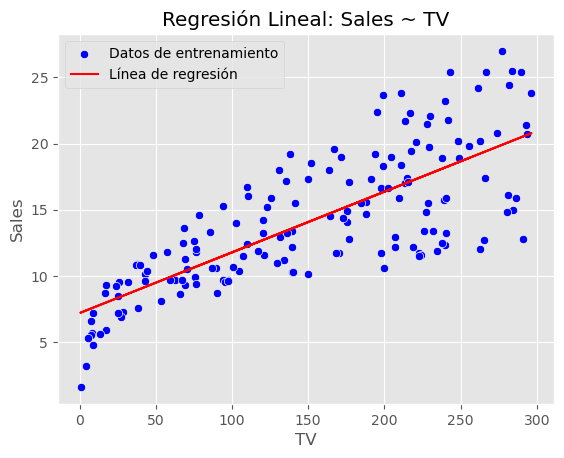

In [34]:
# Gráfico de dispersión de los datos de entrenamiento
sns.scatterplot(x='TV', y='sales', data=data_train, color ='blue', label='Datos de entrenamiento')

# Línea de regresión ajustada
plt.plot(data_train['TV'], modelo.predict(data_train['TV']), color='red', label='Línea de regresión')

# Etiquetas y leyenda
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regresión Lineal: Sales ~ TV')
plt.legend()

# Mostrar el gráfico
plt.show()

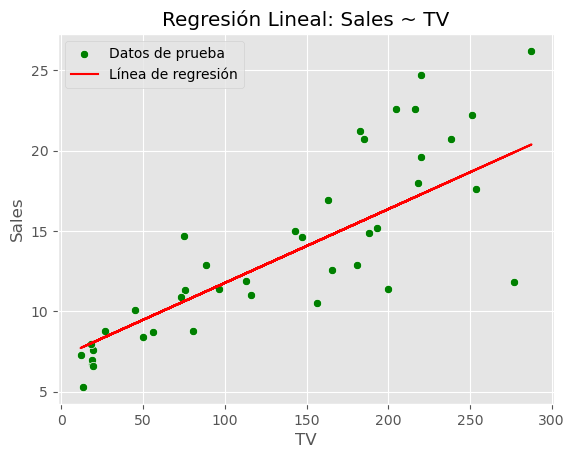

In [35]:
data_test = pd.DataFrame(np.hstack((X_test, y_test)), columns=['TV', 'sales'])
# Gráfico de dispersión de los datos de prueba
sns.scatterplot(x='TV', y='sales', data=data_test, color ='green', label='Datos de prueba')

# Línea de regresión ajustada
plt.plot(data_test['TV'], modelo.predict(data_test['TV']), color='red', label='Línea de regresión')

# Etiquetas y leyenda
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regresión Lineal: Sales ~ TV')
plt.legend()

# Mostrar el gráfico
plt.show()

In [37]:
# Modelo con datos de prueba
modelo_test = smf.ols(formula = 'sales ~ TV', data = data_test)
modelo_test = modelo_test.fit()
data_train.head()

,TV,sales
0,62.3,9.7
1,280.7,16.1
2,78.2,14.6
3,265.6,17.4
4,228.3,15.5


In [39]:
modelo_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     88.81
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.73e-11
Time:                        16:08:57   Log-Likelihood:                -101.31
No. Observations:                  40   AIC:                             206.6
Df Residuals:                      38   BIC:                             210.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3917      0.922      6.929      0.000       4.524       8.259
TV             0.0553      0.006      9.424      0.000       0.043       0.067
==============================================================================
Omnibus:                        6.585   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                5.888
Skew:                          -0.593   Prob(JB):                       0.0526
Kurtosis:                       4.458   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Supuestos del modelo

In [40]:

resid_val = modelo.resid
fitted_val= modelo.predict()
print(f"Media de los residuales: {modelo.resid.mean()}")
print(f"Desviación estándar de los residuales: {modelo.resid.std()}")

Media de los residuales: 6.52811138479592e-15
Desviación estándar de los residuales: 3.2729026554197542


## Prueba de normalidad

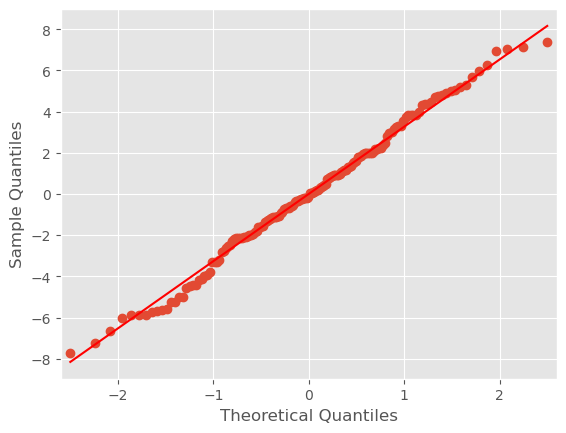

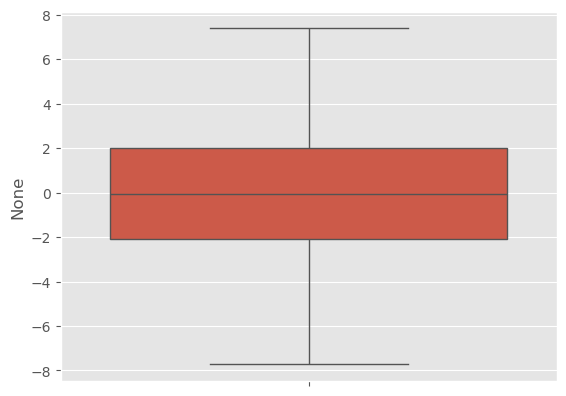

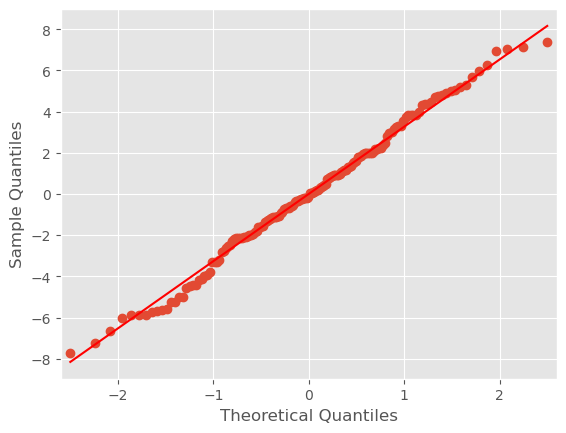

In [41]:
sns.boxplot(y = resid_val)
sm.qqplot(resid_val, line = 's')

ShapiroResult(statistic=0.9911856333712955, pvalue=0.4271844389043653)

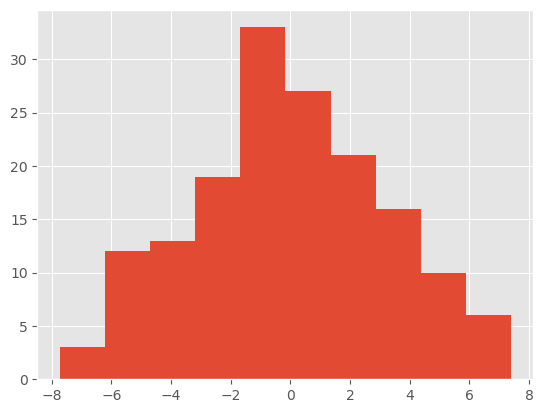

In [42]:
plt.hist(resid_val)

stats.shapiro(modelo.resid) #from scipy import stats

$$H_0: \text{los residuales son normales} \quad vs. \quad  H_a:\text{los residuales NO-son normales} $$

No hay nomalidad en los residuales

Text(0.5, 1.0, 'Fitted vs Observed')

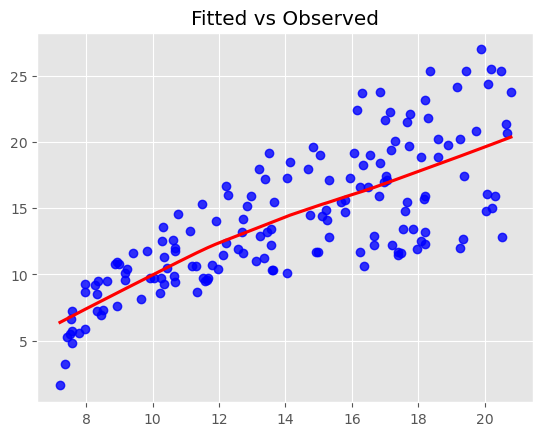

In [43]:
# Linearity in Model

sns.regplot(x=fitted_val,y = y_train, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Observed')

Text(0.5, 1.0, 'Fitted vs Residuals')

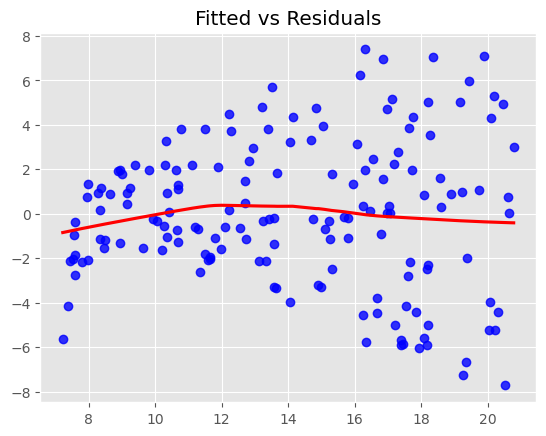

In [44]:
# Homocedasticidad: Igauldad de varianzas
sns.regplot(x=fitted_val,y = resid_val, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residuals')

Text(0.5, 1.0, 'Fitted vs Residuals stand')

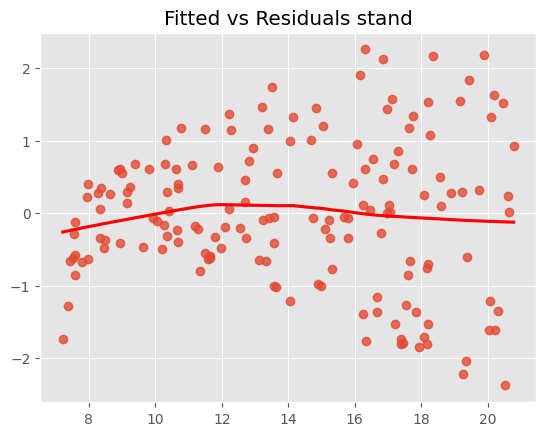

In [ ]:
# Es mejor usar los residuales estandarizados
resid_stand= modelo.get_influence().resid_studentized_internal
sns.regplot(x=fitted_val,y = resid_stand, lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residuals stand')

La prueba más comúnmente utilizada para verificar la homocedasticidad (homogeneidad de varianzas) en los residuales de un modelo de regresión es la prueba de Breusch-Pagan. Esta prueba evalúa si la varianza de los residuales es constante en todos los niveles de las variables independientes. La hipótesis nula y alternativa para la prueba de Breusch-Pagan son las siguientes:

Hipótesis Nula (H0): La varianza de los residuales es constante (homocedasticidad).

Hipótesis Alternativa (H1): La varianza de los residuales no es constante (heterocedasticidad).

La estadística de la prueba sigue una distribución chi-cuadrado, y se compara el valor p asociado con esta estadística con un umbral de significancia (comúnmente 0.05).

valores limite de apalancamiento: 0.02


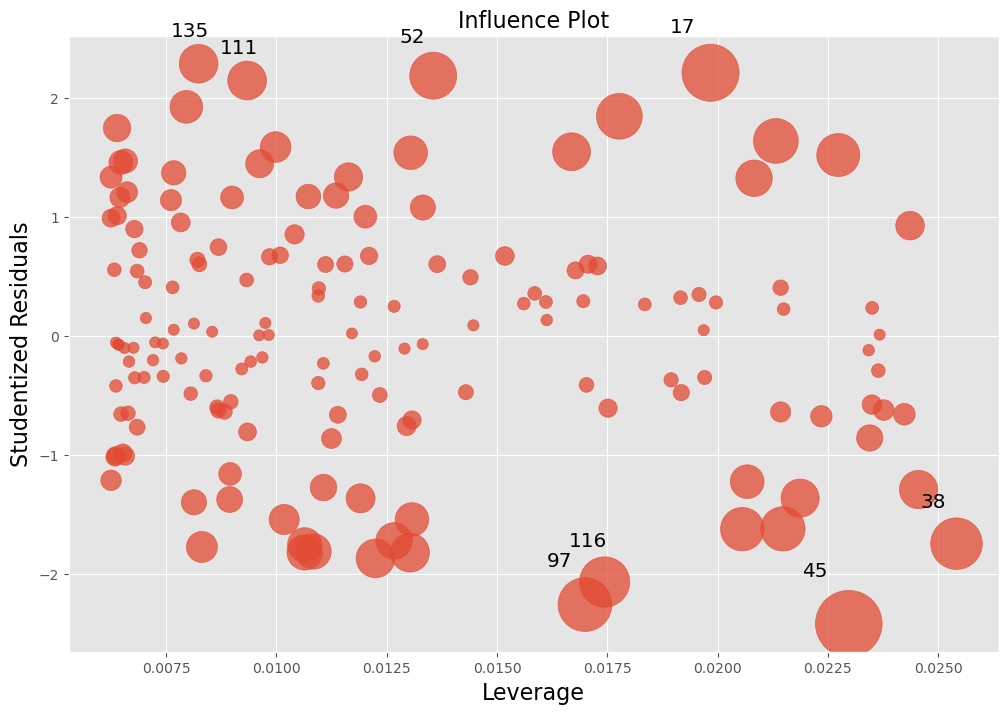

In [45]:
# Leverage points: apalancamiento

#Influence points: cook distance (Gráfico de influencia)
fig, ax = plt.subplots(figsize = (12,8))
sm.graphics.influence_plot(modelo, alpha = 0.05, ax = ax, criterion = 'cooks')
'''
Para determinar los valores de límites de apalancamiento se usa la fórmula 2*p/n, donde:
p = el número de coeficientes
n = el número de observaciones
'''
print('valores limite de apalancamiento:', (2*(X.shape[1]+1))/X.shape[0])

1 Aplica la prueba de Breusch-Pagan  
2 Prueba de Durbin-Watson  
3 Aplica la prueba de Jarque-Bera (JB)

## Ajuste del Modelo utilizando matrices como en scikitlearn (Más recomendada)

In [47]:
X_train = sm.add_constant(X_train, prepend = True) #A la partici[on definida en líneas anteriores, agregamos una f¿columna constante, estp la hace más fiel a la teoría
modelo = sm.OLS(y_train, X_train).fit()
print(modelo.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     229.2
Date:                Sun, 25 May 2025   Prob (F-statistic):           1.44e-32
Time:                        16:41:29   Log-Likelihood:                -416.24
No. Observations:                 160   AIC:                             836.5
Df Residuals:                     158   BIC:                             842.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1815      0.525     13.673      0.0

In [48]:
# Intervalos de confianza para los coeficientes del modelo
# ==============================================================================
modelo.conf_int(0.05)

array([[6.1441294 , 8.21893011],
       [0.03990753, 0.05188159]])

In [49]:
predicciones = modelo.get_prediction(X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10.040761,0.372931,9.304189,10.777333,3.514354,16.567167
1,20.064132,0.472025,19.131839,20.996425,13.512750,26.615515
2,10.770484,0.339982,10.098988,11.441981,4.251102,17.289867
3,19.371125,0.434524,18.512899,20.229350,12.829871,25.912378


In [50]:
# Predicciones con intervalo de confianza del 95%
# ==============================================================================
predicciones = modelo.get_prediction(X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')


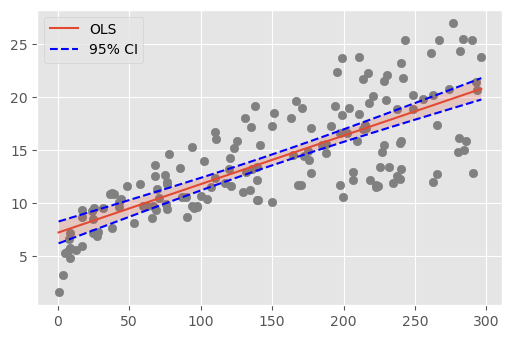

In [51]:
# Gráfico del modelo
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "gray")
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', label="OLS")
ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='--', color='blue', label="95% CI")
ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='--', color='blue')
ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.2)
ax.legend();

In [52]:

print(f"Media de los residuales: {modelo.resid.mean()}")
print(f"Desviación estándar de los residuales: {modelo.resid.std()}")

Media de los residuales: 6.52811138479592e-15
Desviación estándar de los residuales: 3.262658803515101
